In [2]:
import pandas as pd
import numpy as np

# Load the time cue data
file_path = 'onsets_aubio.csv'
time_cue_data = pd.read_csv(file_path, header=None)

# Convert the time cue data to a 1D NumPy array
time_cue_array = time_cue_data[0].to_numpy()

# Optional: format to specific precision (if you want 8 decimal places, for example)
onset_times = np.array([f"{x:.8f}" for x in time_cue_array])

# Convert formatted strings back to float and print the array in the desired format
onset_times = time_cue_array.round(8)
print(onset_times)

[0.00000000e+00 4.77777800e-02 1.11609980e-01 1.47573700e-01
 2.02630380e-01 2.59138320e-01 2.87777780e-01 3.35532880e-01
 4.14943310e-01 5.19206350e-01 2.64290249e+00 2.74272109e+00
 4.80333333e+00 4.86877551e+00 4.88587302e+00 4.98727891e+00
 6.95346939e+00 7.02716553e+00 7.09120181e+00 7.10956916e+00
 7.21022676e+00 9.35476190e+00 9.45519274e+00 1.15570975e+01
 1.15735828e+01 1.16758730e+01 1.37151927e+01 1.37790249e+01
 1.37979138e+01 1.38988662e+01 1.55533333e+01 1.60256689e+01
 1.60420862e+01 1.61435147e+01 1.77761224e+01 1.82516100e+01
 1.82655782e+01 1.83667347e+01 2.00231293e+01 2.04271202e+01
 2.04938095e+01 2.06113832e+01 2.06596145e+01 2.07113379e+01
 2.17817007e+01 2.22466667e+01 2.27213152e+01 2.27329705e+01
 2.28348753e+01 2.29352154e+01 2.34500227e+01 2.35233787e+01
 2.35886848e+01 2.39211338e+01 2.39915419e+01 2.40093197e+01
 2.40290476e+01 2.40934240e+01 2.42493878e+01 2.43729478e+01
 2.44912018e+01 2.45591156e+01 2.48956916e+01 2.49606122e+01
 2.49772336e+01 2.508043

In [3]:
import numpy as np

# Desired interval and tolerance
interval = 2.23    # Desired interval in seconds
tolerance = 0.1   # Tolerance in seconds

# Build a directed acyclic graph (DAG) where nodes are onset times
edges = {t: [] for t in onset_times}

# Construct edges between onset times that are approximately 'interval' apart
for i in range(len(onset_times)):
    for j in range(i + 1, len(onset_times)):
        delta_t = onset_times[j] - onset_times[i]
        if abs(delta_t - interval) <= tolerance:
            edges[onset_times[i]].append(onset_times[j])

# Function to find the longest path starting from a given node
def find_longest_path(node, edges, memo):
    if node in memo:
        return memo[node]
    max_length = 1
    max_path = [node]
    for neighbor in edges[node]:
        path = find_longest_path(neighbor, edges, memo)
        if 1 + len(path) > max_length:
            max_length = 1 + len(path)
            max_path = [node] + path
    memo[node] = max_path
    return max_path

# Find all longest sequences in the DAG
memo = {}
longest_length = 0
longest_paths = []

for node in onset_times:
    path = find_longest_path(node, edges, memo)
    if len(path) > longest_length:
        longest_length = len(path)
        longest_paths = [path]
    elif len(path) == longest_length:
        longest_paths.append(path)

# Output all sequences that have the longest length
for idx, path in enumerate(longest_paths):
    print(f"Sequence {idx + 1}:")
    print(np.array(path))

Sequence 1:
[ 0.33553288  2.64290249  4.80333333  7.02716553  9.3547619  11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 33.89403628 36.1407483  38.38446712
 40.60596372 42.84984127 45.07115646 47.31435374 49.5378458  51.7822449
 53.94340136 56.23986395 58.47145125 60.699161   62.93659864 65.15827664
 67.40297052 69.62666667]
Sequence 2:
[ 0.41494331  2.64290249  4.80333333  7.02716553  9.3547619  11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 33.89403628 36.1407483  38.38446712
 40.60596372 42.84984127 45.07115646 47.31435374 49.5378458  51.7822449
 53.94340136 56.23986395 58.47145125 60.699161   62.93659864 65.15827664
 67.40297052 69.62666667]
Sequence 3:
[ 0.51920635  2.74272109  4.88587302  7.02716553  9.3547619  11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 3

In [8]:
# Automatically detect the number of sequences
num_sequences = len(longest_paths)

# Loop through all sequences and print them dynamically
for idx in range(num_sequences):
    sequence = longest_paths[idx]
    print(f"Sequence {idx + 1}:")
    print(np.array(sequence))

    # You can store each sequence in a variable dynamically if needed
    # e.g., if you want to store the first sequence:
    if idx == 0:
        seq1 = sequence
    elif idx == 1:
        seq2 = sequence
    elif idx == 2:
        seq3 = sequence


Sequence 1:
[ 0.33553288  2.64290249  4.80333333  7.02716553  9.3547619  11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 33.89403628 36.1407483  38.38446712
 40.60596372 42.84984127 45.07115646 47.31435374 49.5378458  51.7822449
 53.94340136 56.23986395 58.47145125 60.699161   62.93659864 65.15827664
 67.40297052 69.62666667]
Sequence 2:
[ 0.41494331  2.64290249  4.80333333  7.02716553  9.3547619  11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 33.89403628 36.1407483  38.38446712
 40.60596372 42.84984127 45.07115646 47.31435374 49.5378458  51.7822449
 53.94340136 56.23986395 58.47145125 60.699161   62.93659864 65.15827664
 67.40297052 69.62666667]
Sequence 3:
[ 0.51920635  2.74272109  4.88587302  7.02716553  9.3547619  11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 3

In [12]:
# Access Sequence 1 (first sequence)
seq1 = longest_paths[0]

# Access Sequence 2 (second sequence)
seq2 = longest_paths[1]

# Access Sequence 2 (second sequence)
seq3 = longest_paths[2]

# Example: print both sequences to verify
print("Sequence 1:")
print(np.array(seq1))

print("Sequence 2:")
print(np.array(seq2))

print("Sequence 3:")
print(np.array(seq3))

Sequence 1:
[ 0.33553288  2.64290249  4.80333333  7.02716553  9.3547619  11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 33.89403628 36.1407483  38.38446712
 40.60596372 42.84984127 45.07115646 47.31435374 49.5378458  51.7822449
 53.94340136 56.23986395 58.47145125 60.699161   62.93659864 65.15827664
 67.40297052 69.62666667]
Sequence 2:
[ 0.41494331  2.64290249  4.80333333  7.02716553  9.3547619  11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 33.89403628 36.1407483  38.38446712
 40.60596372 42.84984127 45.07115646 47.31435374 49.5378458  51.7822449
 53.94340136 56.23986395 58.47145125 60.699161   62.93659864 65.15827664
 67.40297052 69.62666667]
Sequence 3:
[ 0.51920635  2.74272109  4.88587302  7.02716553  9.3547619  11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 3

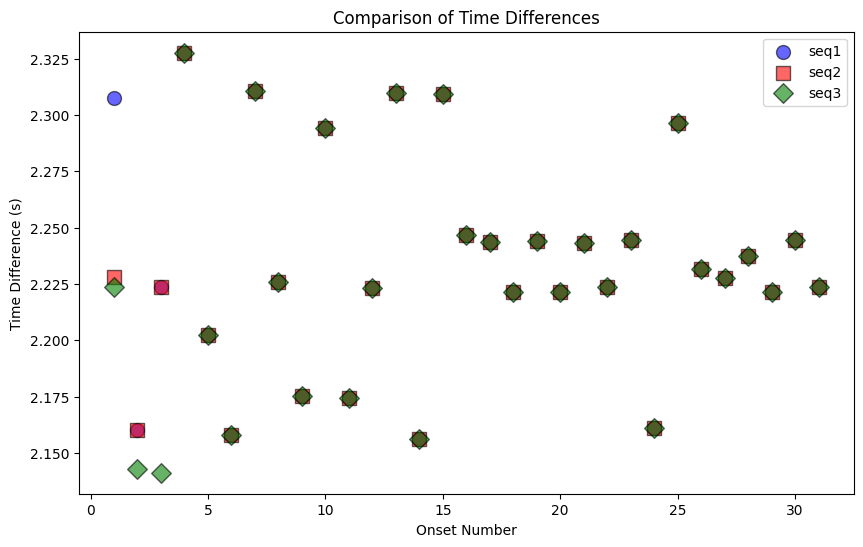

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Compute differences for each sequence
seq1_diff = np.diff(seq1)
seq2_diff = np.diff(seq2)
seq3_diff = np.diff(seq3)

# Create a DataFrame for plotting
numbers = np.arange(1, len(seq1_diff) + 1)
data_plot = pd.DataFrame({"onset_nr": numbers, "seq1_diff": seq1_diff, "seq2_diff": seq2_diff, "seq3_diff": seq3_diff})

# Plotting the data with transparency (no jitter)
plt.figure(figsize=(10, 6))

# Plot seq1 with transparency and distinguishable markers
plt.scatter(data_plot["onset_nr"], 
            data_plot["seq1_diff"], label="seq1", 
            marker="o", color="blue", s=100, edgecolor='black', alpha=0.6)

# Plot seq2 with transparency and distinguishable markers
plt.scatter(data_plot["onset_nr"], 
            data_plot["seq2_diff"], label="seq2", 
            marker="s", color="red", s=100, edgecolor='black', alpha=0.6)

# Plot seq3 with transparency and distinguishable markers
plt.scatter(data_plot["onset_nr"], 
            data_plot["seq3_diff"], label="seq3", 
            marker="D", color="green", s=100, edgecolor='black', alpha=0.6)

# Add labels, title, and legend
plt.legend(loc="upper right")
plt.xlabel("Onset Number")
plt.ylabel("Time Difference (s)")
plt.title("Comparison of Time Differences")

# Display the plot
plt.show()


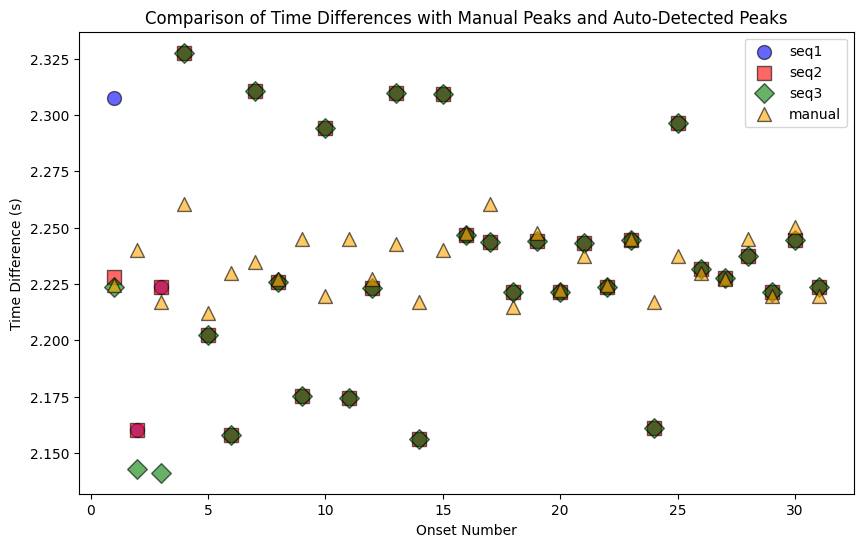

In [21]:
manual_peaks = np.array([
    0.398730159, 2.623492063, 4.863492063, 7.080634921, 9.340952381, 11.553015873,
    13.782857143, 16.017777778, 18.245079365, 20.490158730, 22.709841270, 24.954920635,
    27.182222222, 29.424761905, 31.641904762, 33.881904762, 36.129523810, 38.389841270,
    40.604444444, 42.852063492, 45.074285714, 47.311746032, 49.536507937, 51.781587302,
    53.998730159, 56.236190476, 58.466031746, 60.693333333, 62.938412698, 65.158095238,
    67.408253968, 69.627936508
])



# Compute differences for each sequence
seq1_diff = np.diff(seq1)
seq2_diff = np.diff(seq2)
seq3_diff = np.diff(seq3)
manual_diff = np.diff(manual_peaks)  # Add manual peaks differences

# Create a DataFrame for plotting
numbers = np.arange(1, len(seq1_diff) + 1)
data_plot = pd.DataFrame({
    "onset_nr": numbers, 
    "seq1_diff": seq1_diff, 
    "seq2_diff": seq2_diff, 
    "seq3_diff": seq3_diff, 
    "manual_diff": manual_diff  # Include manual peaks data
})

# Plotting the data with transparency (no jitter)
plt.figure(figsize=(10, 6))

# Plot seq1
plt.scatter(data_plot["onset_nr"], 
            data_plot["seq1_diff"], label="seq1", 
            marker="o", color="blue", s=100, edgecolor='black', alpha=0.6)

# Plot seq2
plt.scatter(data_plot["onset_nr"], 
            data_plot["seq2_diff"], label="seq2", 
            marker="s", color="red", s=100, edgecolor='black', alpha=0.6)

# Plot seq3
plt.scatter(data_plot["onset_nr"], 
            data_plot["seq3_diff"], label="seq3", 
            marker="D", color="green", s=100, edgecolor='black', alpha=0.6)

# Plot manual peaks with a new color, let's use orange
plt.scatter(data_plot["onset_nr"], 
            data_plot["manual_diff"], label="manual", 
            marker="^", color="orange", s=100, edgecolor='black', alpha=0.6)

# Add labels, title, and legend
plt.legend(loc="upper right")
plt.xlabel("Onset Number")
plt.ylabel("Time Difference (s)")
plt.title("Comparison of Time Differences with Manual Peaks and Auto-Detected Peaks")

# Display the plot
plt.show()


In [18]:
import pandas as pd

# Create a DataFrame from seq2
df_seq2 = pd.DataFrame({"seq2": seq2})

# Save the DataFrame to a CSV file
df_seq2.to_csv('seq2.csv', index=False)

print("Sequence 2 has been saved to 'seq2.csv'")


Sequence 2 has been saved to 'seq2.csv'


In [25]:
import pandas as pd
import numpy as np

# Load the time cue data (assuming no headers)
file_path2 = 'seq1.csv'
time_cue_data2 = pd.read_csv(file_path2, header=None)

# Convert the time cue data to a 1D NumPy array and ensure it's numeric
time_cue_array2 = pd.to_numeric(time_cue_data2[0], errors='coerce').to_numpy()

# Remove NaN values (if present)
time_cue_array2 = time_cue_array2[~np.isnan(time_cue_array2)]

# Optional: format to specific precision (8 decimal places)
onset_times2 = np.round(time_cue_array2, 8)

# Print the array in the desired format
print(onset_times2)


[ 0.40054422  2.61804989  4.85877551  7.08208617  9.32281179 11.52870748
 13.7752381  16.01596372 18.21024943 20.48580499 22.70911565 24.95564626
 27.17315193 29.41968254 31.6429932  33.88952381 36.11283447 38.37678005
 40.6000907  42.84081633 45.06993197 47.3106576  49.53396825 51.78049887
 53.99800454 56.24453515 58.4678458  60.6737415  62.93768707 65.15519274
 67.40172336 69.62503401]


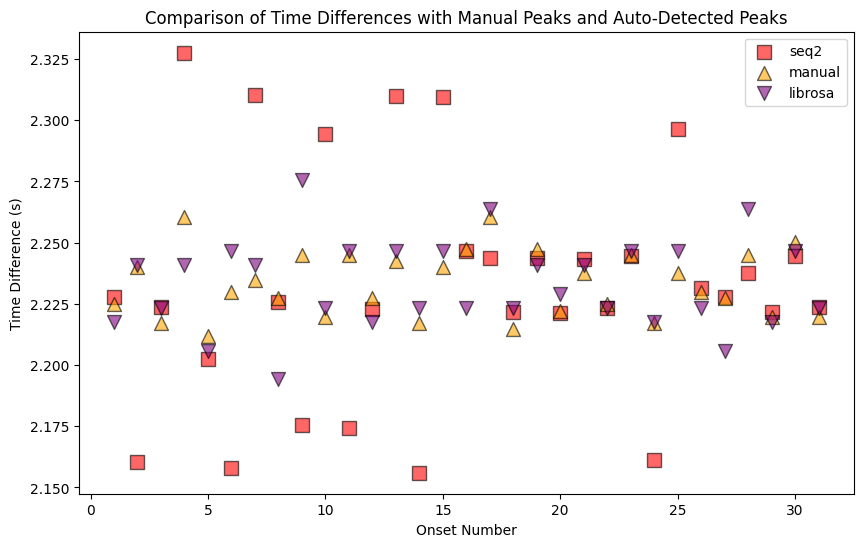

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Compute differences for each sequence
seq1_diff = np.diff(seq1)
seq2_diff = np.diff(seq2)
seq3_diff = np.diff(seq3)
manual_diff = np.diff(manual_peaks)
onset_times2_diff = np.diff(onset_times2)  # Add onset_times2 differences

# Create a DataFrame for plotting
numbers = np.arange(1, len(seq1_diff) + 1)
data_plot = pd.DataFrame({
    "onset_nr": numbers, 
    "seq1_diff": seq1_diff, 
    "seq2_diff": seq2_diff, 
    "seq3_diff": seq3_diff, 
    "manual_diff": manual_diff,
    "onset_times2_diff": onset_times2_diff  # Include onset_times2 data
})

# Plotting the data with transparency (no jitter)
plt.figure(figsize=(10, 6))

# # Plot seq1
# plt.scatter(data_plot["onset_nr"], 
#             data_plot["seq1_diff"], label="seq1", 
#             marker="o", color="blue", s=100, edgecolor='black', alpha=0.6)

# Plot seq2
plt.scatter(data_plot["onset_nr"], 
            data_plot["seq2_diff"], label="seq2", 
            marker="s", color="red", s=100, edgecolor='black', alpha=0.6)

# # Plot seq3
# plt.scatter(data_plot["onset_nr"], 
#             data_plot["seq3_diff"], label="seq3", 
#             marker="D", color="green", s=100, edgecolor='black', alpha=0.6)

# Plot manual peaks with a new color, let's use orange
plt.scatter(data_plot["onset_nr"], 
            data_plot["manual_diff"], label="manual", 
            marker="^", color="orange", s=100, edgecolor='black', alpha=0.6)

# Plot onset_times2 with another new color, let's use purple
plt.scatter(data_plot["onset_nr"], 
            data_plot["onset_times2_diff"], label="librosa", 
            marker="v", color="purple", s=100, edgecolor='black', alpha=0.6)

# Add labels, title, and legend
plt.legend(loc="upper right")
plt.xlabel("Onset Number")
plt.ylabel("Time Difference (s)")
plt.title("Comparison of Time Differences with Manual Peaks and Auto-Detected Peaks")

# Display the plot
plt.show()
